In [22]:
from matplotlib import pyplot as plt
from matplotlib_venn import venn3, venn3_circles

In [16]:
lista_futbol = [3, 5, 10, 12]
tupla_squash = (10, 20, 15, 5)
diccio_tenis = {"infantil": 12,  "juniors": 10,
                "adolescentes": 20, "adultos": 18}
universal = 100
ninguno = 0

In [17]:
def suma_futbol(lista_futbol):
    suma = 0
    for elemento in lista_futbol:
        suma = suma + elemento
    return suma

futbol = suma_futbol(lista_futbol)
print(futbol)

# 50 entrenan squash
def suma_squash(tupla_squash):
    suma = 0
    for elemento in tupla_squash:
        suma = suma + elemento
    return suma

squash = suma_squash(tupla_squash)
print(squash)

# 60 entrenan tenis
def suma_tenis(diccio_tenis):
    suma = 0
    for elemento in diccio_tenis.values():
        suma = suma + elemento
    return suma

tenis = suma_tenis(diccio_tenis)
print(tenis)

30
50
60


In [18]:
def set_tenis(diccio_tenis):
    tenis = set()
    for elemento in diccio_tenis.values():
        tenis.add(elemento)
    return tenis

tenis = set_tenis(diccio_tenis)
print(tenis)

# También tengo que convertir tuplas y listas a set
# paso a set la lista
futbol = set(lista_futbol)
print(futbol)

# paso a set la tupla
squash = set(tupla_squash)
print(squash)

{10, 18, 12, 20}
{10, 3, 12, 5}
{10, 20, 5, 15}


In [19]:
def soloFT(t, f):
    return (t & f)

soloFT = soloFT(tenis, futbol)
print(soloFT)

# 30 entrenan squash y tenis
# squash_tenis = 30
def soloTS(s, t):
    return (s & t)

soloTS = soloTS(squash, tenis)
print(soloTS)

# 15 entrenan squash y fútbol.
# squash_futbol = 15
def soloSF(s, f):
    return (s & f)

soloSF = soloSF(squash, futbol)
print(soloSF)

# Si 10 deportistas entrenan los tres deportes
# squash_tenis_futbol = 10
def squash_tenis_futbol(f, s, t):
    return (f & t & s)

squash_tenis_futbol = squash_tenis_futbol(futbol, tenis, squash)
print(squash_tenis_futbol)

{10, 12}
{10, 20}
{10, 5}
{10}


In [20]:
def soloT(f, s, t):
    return (t - s) & (t - f)

soloT = soloT(futbol, squash, tenis)
print(soloT)

# "Entrenan sólo fútbol = "
def soloF(f, s, t):
    return (f - s) & (f - t)

soloF = soloF(futbol, squash, tenis)
print(soloF)

# "Entrenan sólo squash = "
def soloS(f, s, t):
    return (s - t) & (s - f)

soloS = soloS(futbol, squash, tenis)
print(soloS)

# "Entrenan tenis o fútbol = "
# para responder la pregunta hay que sumar los elementos del 
# resultado de la operación entre conjuntos
def tenis_o_futbol(f, t):
    suma = 0
    t_o_f = ((t - f) | f)
    for elemento in t_o_f:
        suma = suma + elemento
    return suma

tenis_o_futbol = tenis_o_futbol(futbol, tenis)
print(tenis_o_futbol)

{18}
{3}
{15}
68


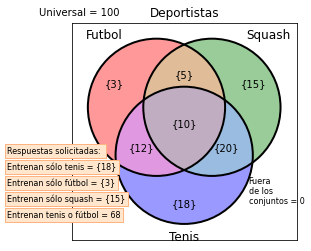

In [21]:
# preparamos la ventana del gráfico
plt.figure('Ejemplo de primer parcial ')

# dibujamos los diagramas
diagram = venn3((1, 1, 1, 1, 1, 1, 1), set_labels=(
    "Futbol", "Squash", "Tenis"))

# establecemos el tamaño de la fuente
for subset in ("111", "110", "101", "100", "011", "010", "001"):
    diagram.get_label_by_id(subset).set_fontsize(10)

# transferimos los resultados de las operaciones
diagram.get_label_by_id('100').set_text(soloF)
diagram.get_label_by_id('010').set_text(soloS)
diagram.get_label_by_id('001').set_text(soloT)
diagram.get_label_by_id('110').set_text(soloSF - squash_tenis_futbol)
diagram.get_label_by_id('011').set_text(soloTS - squash_tenis_futbol)
diagram.get_label_by_id('101').set_text(soloFT - squash_tenis_futbol)
diagram.get_label_by_id('111').set_text(squash_tenis_futbol)

# marcamos los contornos
c = venn3_circles(subsets=(1, 1, 1, 1, 1, 1, 1))

# agregamos más datos aclaratorios al gráfico
plt.text(-0.90, 0.67,      # Texto y cantidad universal
         f"Universal = {universal}",
         size=10)

plt.text(0.40, -0.5,      # Texto fuera del conjunto
         f"Fuera\nde los\nconjuntos = {ninguno}",
         size=8)

# Respondemos las preguntas
plt.text(-1.10, -0.20,
         s="Respuestas solicitadas: ",
         size=8,
         ha="left",  # alineación horizontal
         va="bottom",  # alineación vertical
         bbox=dict(boxstyle="square",  # tipo de cuadro
                   ec=(1.0, 0.7, 0.5),
                   fc=(1.0, 0.9, 0.8),))

plt.text(-1.10, -0.30,
         s="Entrenan sólo tenis = " + str(soloT),
         size=8,
         ha="left",  # alineación horizontal
         va="bottom",  # alineación vertical
         bbox=dict(boxstyle="square",  # tipo de cuadro
                   ec=(1.0, 0.7, 0.5),
                   fc=(1.0, 0.9, 0.8),))

plt.text(-1.10, -0.40,
         s="Entrenan sólo fútbol = " + str(soloF),
         size=8,
         ha="left",  # alineación horizontal
         va="bottom",  # alineación vertical
         bbox=dict(boxstyle="square",  # tipo de cuadro
                   ec=(1.0, 0.7, 0.5),
                   fc=(1.0, 0.9, 0.8),))

plt.text(-1.10, -0.50,
         s="Entrenan sólo squash = " + str(soloS),
         size=8,
         ha="left",  # alineación horizontal
         va="bottom",  # alineación vertical
         bbox=dict(boxstyle="square",  # tipo de cuadro
                   ec=(1.0, 0.7, 0.5),
                   fc=(1.0, 0.9, 0.8),))

plt.text(-1.10, -0.60,
         s="Entrenan tenis o fútbol = " + str(tenis_o_futbol),
         size=8,
         ha="left",  # alineación horizontal
         va="bottom",  # alineación vertical
         bbox=dict(boxstyle="square",  # tipo de cuadro
                   ec=(1.0, 0.7, 0.5),
                   fc=(1.0, 0.9, 0.8),))

plt.axis('on')  # Recuadro
plt.title("Deportistas")
plt.show()

